## Relatório Final de Projeto

Integrantes: Emyle Santos, João Vittor e Júlia Gabriele

Este projeto apresenta uma análise detalhada dos dados do **RREO** (Relatório Resumido da Execução Orçamentária), focando na interpretação e estudo de dados financeiros e orçamentários reportados pela entidade no primeiro bimestre de 2020 a 2023. Os dados foram fornecidos pela SINCONF (Supervisão de Controle Interno e Financeiro) e têm como objetivo fornecer insights sobre aspectos financeiros no Brasil durante esse período.

Os objetivos deste projeto são:

- Analisar as principais fontes de receita da entidade: Identificar e estudar as fontes de receita mais relevantes da entidade nos anos de 2020, 2021, 2022 e 2023, visando **entender as variações e tendências** ao longo desse período.

- Avaliar o comportamento das despesas: Realizar uma análise detalhada das despesas totais da entidade em cada ano, destacando as **categorias de despesa** mais significativas e suas variações.

- Examinar os principais investimentos: Identificar os principais investimentos realizados pela entidade durante o primeiro bimestre dos anos de 2020, 2021, 2022 e 2023, buscando avaliar seu impacto no **contexto financeiro.**

Afim de serem respondidas as seguintes perguntas: 
- Quais foram as principais fontes de receita da entidade no período de 2020 à 2023?
- Quais foram as receitas correntes da Prefeitura Municipal de João Pessoa no período analisado?
- Há relação entre o tamanho da população e o valor das receitas obtidas em cada ano?

## Exploração Inicial

In [35]:
%pip install pandas matplotlib numpy==1.25 seaborn scikit-learn 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [37]:
caminho_dados = 'dados/dados_totais.csv'

dataset = pd.read_csv(caminho_dados, encoding="utf-8")

dataset.head()

,Ano,Instituição,UF,População,Conta,Identificador da Conta,Valor
0,2020,Prefeitura Municipal de Salvador - BA,BA,2872347,RECEITAS CORRENTES (I),siconfi-cor_ReceitasCorrentesLiquidasExcetoTra...,"466790106,72"
1,2020,Prefeitura Municipal de Salvador - BA,BA,2872347,"Impostos, Taxas e Contribuições de Melhoria",siconfi-cor_ReceitaTributariaLiquidaExcetoTran...,"180696307,37"
2,2020,Prefeitura Municipal de Salvador - BA,BA,2872347,IPTU,siconfi-cor_IPTULiquidoExcetoTransferenciasEFU...,"44621156,9"
3,2020,Prefeitura Municipal de Salvador - BA,BA,2872347,ISS,siconfi-cor_ISSLiquidoExcetoTransferenciasEFUNDEB,"89552072,14"
4,2020,Prefeitura Municipal de Salvador - BA,BA,2872347,ITBI,siconfi-cor_ITBILiquidoExcetoTransferenciasEFU...,"11665932,12"


In [38]:
# Criando uma copia do dataset para não modificar o original
dataset_copia = dataset.copy()

In [39]:
#Vamos verificar a existencia de valores nulos e o tipo de dado em cada coluna como o info()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40244 entries, 0 to 40243
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Ano                     40244 non-null  int64 
 1   Instituição             40244 non-null  object
 2   UF                      40244 non-null  object
 3   População               40244 non-null  int64 
 4   Conta                   40244 non-null  object
 5   Identificador da Conta  40244 non-null  object
 6   Valor                   40244 non-null  object
dtypes: int64(2), object(5)
memory usage: 2.1+ MB


Notamos que a coluna valor, apesar de aparentemente ser de um tipo numérico, ela está sendo descrita como 'objeto'. Precisamos transformá-la em float para fazer a descrição estatística desses dados. Como a coluna valor não possui valores nulos, um dos possíveis motivos do problema é que os numeros float estão sendo representados com vírgula e o pandas não reconhece. Iremos trocar a vírgula pelo ponto.

In [40]:
dataset_copia['Valor'] = dataset['Valor'].str.replace(',', '.', regex=False).astype(float)

In [41]:
# Descrição estatística dos dados
dataset_copia.describe()

,Ano,População,Valor
count,40244.000000,4.024400e+04,4.024400e+04
mean,2021.483327,1.879772e+06,3.603152e+08
std,1.110318,2.517806e+06,2.388364e+09
min,2020.000000,2.991270e+05,-6.492568e+07
25%,2021.000000,5.489520e+05,5.095644e+06
50%,2021.000000,1.018948e+06,2.593640e+07
75%,2022.000000,1.963726e+06,1.373002e+08
max,2023.000000,1.239637e+07,8.657029e+10


Analisando a descrição estatísca, podemos retirar algumas informações sobre os dados:

*1*- Na coluna 'Ano', temos tres valores 2020, 2021, 2022 e 2023, que correspondem aos anos que os dados foram retirados       
    1.1- A mediana fica entre 2021 e 2022, o que significa que metade dos dados correspondem a esta média.

*2*- Na coluna 'População', a média é na casa dos milhões, sugerindo que os dados estão em uma escala grande        
    2.1- O desvio padrão de 2,517,805.83 sugere uma alta variação, com valores que se espalham amplamente em torno da média.

*3*- Na coluna 'Valor_clean', a média também é um valor bem alto (na casa de centenas de milhões), o que sugere a alta escala de valores tambem.      
    3.1- Analisando o valor min e max, notamos a existência de valores negativos nos dados, o que faz sentido, levando em consideração
que a coluna traz informações sobre os pagamentos de contas.

In [42]:
dataset_copia.head()

,Ano,Instituição,UF,População,Conta,Identificador da Conta,Valor
0,2020,Prefeitura Municipal de Salvador - BA,BA,2872347,RECEITAS CORRENTES (I),siconfi-cor_ReceitasCorrentesLiquidasExcetoTra...,4.667901e+08
1,2020,Prefeitura Municipal de Salvador - BA,BA,2872347,"Impostos, Taxas e Contribuições de Melhoria",siconfi-cor_ReceitaTributariaLiquidaExcetoTran...,1.806963e+08
2,2020,Prefeitura Municipal de Salvador - BA,BA,2872347,IPTU,siconfi-cor_IPTULiquidoExcetoTransferenciasEFU...,4.462116e+07
3,2020,Prefeitura Municipal de Salvador - BA,BA,2872347,ISS,siconfi-cor_ISSLiquidoExcetoTransferenciasEFUNDEB,8.955207e+07
4,2020,Prefeitura Municipal de Salvador - BA,BA,2872347,ITBI,siconfi-cor_ITBILiquidoExcetoTransferenciasEFU...,1.166593e+07


In [43]:
# Vamos visualizar melhor as linhas referentes aos valores negativos da coluna "valor"
df_valores_negativos = dataset_copia[dataset_copia['Valor'] < 0]

df_valores_negativos

,Ano,Instituição,UF,População,Conta,Identificador da Conta,Valor
267,2020,Prefeitura Municipal de Salvador - BA,BA,2872347,Receita Industrial,siconfi-cor_RREO3ReceitaIndustrial,-5051.26
1028,2020,Prefeitura Municipal de Vitória - ES,ES,362097,Receita Patrimonial,siconfi-cor_RREO3ReceitaPatrimonial,-3810792.49
1029,2020,Prefeitura Municipal de Vitória - ES,ES,362097,Rendimentos de Aplicação Financeira,siconfi-cor_RendimentosDeAplicacaoFinanceira,-4417014.04
1336,2020,Prefeitura Municipal de Rio Branco - AC,AC,407319,Receita Patrimonial,siconfi-cor_RREO3ReceitaPatrimonial,-181080.92
1337,2020,Prefeitura Municipal de Rio Branco - AC,AC,407319,Rendimentos de Aplicação Financeira,siconfi-cor_RendimentosDeAplicacaoFinanceira,-380745.01
...,...,...,...,...,...,...,...
38465,2023,Prefeitura Municipal de Belém - PA,PA,1499641,Rendimentos de Aplicação Financeira,siconfi-cor_RendimentosDeAplicacaoFinanceira,-1629428.92
38490,2023,Prefeitura Municipal de Belém - PA,PA,1499641,Receita Patrimonial,siconfi-cor_RREO3ReceitaPatrimonial,-1927275.69
38491,2023,Prefeitura Municipal de Belém - PA,PA,1499641,Rendimentos de Aplicação Financeira,siconfi-cor_RendimentosDeAplicacaoFinanceira,-1994966.02
38516,2023,Prefeitura Municipal de Belém - PA,PA,1499641,Receita Patrimonial,siconfi-cor_RREO3ReceitaPatrimonial,-68776.42


    Esses valores negativos podem indicar ajustes contábeis, como devoluções de transferências obrigatórias, correções em receitas e despesas, e situações de déficit orçamentário, onde despesas superam receitas previstas. 

## Pré-processamento de dados

No notebook *limpezadedados.ipynb* foi feita uma limpeza de dados em que foram retiradas colunas como: "Cod.IBGE" e "Coluna", para melhor visualização e dados desnecessários. Após isso, os dados ficaram assim:

In [44]:
dataset_copia

,Ano,Instituição,UF,População,Conta,Identificador da Conta,Valor
0,2020,Prefeitura Municipal de Salvador - BA,BA,2872347,RECEITAS CORRENTES (I),siconfi-cor_ReceitasCorrentesLiquidasExcetoTra...,4.667901e+08
1,2020,Prefeitura Municipal de Salvador - BA,BA,2872347,"Impostos, Taxas e Contribuições de Melhoria",siconfi-cor_ReceitaTributariaLiquidaExcetoTran...,1.806963e+08
2,2020,Prefeitura Municipal de Salvador - BA,BA,2872347,IPTU,siconfi-cor_IPTULiquidoExcetoTransferenciasEFU...,4.462116e+07
3,2020,Prefeitura Municipal de Salvador - BA,BA,2872347,ISS,siconfi-cor_ISSLiquidoExcetoTransferenciasEFUNDEB,8.955207e+07
4,2020,Prefeitura Municipal de Salvador - BA,BA,2872347,ITBI,siconfi-cor_ITBILiquidoExcetoTransferenciasEFU...,1.166593e+07
...,...,...,...,...,...,...,...
40239,2023,Prefeitura Municipal de Cuiabá - MT,MT,618124,Compensações Financ. entre Regimes Previdência,siconfi-cor_CompensacaoFinanceiraEntreRegimesP...,1.101957e+07
40240,2023,Prefeitura Municipal de Cuiabá - MT,MT,618124,Dedução de Receita para Formação do FUNDEB,siconfi-cor_DeducaoDeReceitaParaFormacaoDoFUNDEB,1.415646e+08
40241,2023,Prefeitura Municipal de Cuiabá - MT,MT,618124,RECEITA CORRENTE LÍQUIDA (III) = (I - II),siconfi-cor_RREO3ReceitaCorrenteLiquida,2.747358e+09
40242,2023,Prefeitura Municipal de Cuiabá - MT,MT,618124,RECEITA CORRENTE LÍQUIDA AJUSTADA PARA CÁLCULO...,siconfi-cor_RREO3ReceitaCorrenteLiquidaAjustad...,2.747358e+09


## Gráficos

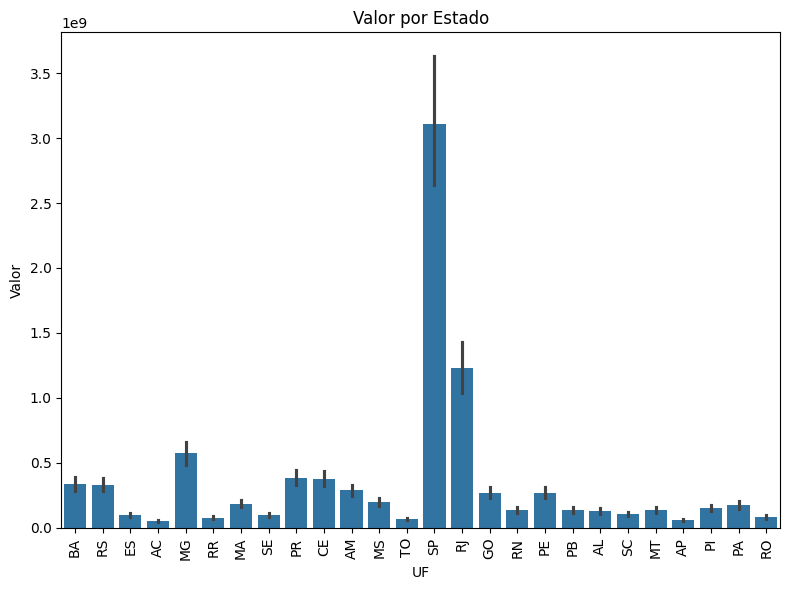

In [45]:
# Grafico de barras que relaciona o valor pago em contas por estado (UF)

plt.figure(figsize=(8, 6)) 
sns.barplot(x='UF', y='Valor', data=dataset_copia)

plt.title('Valor por Estado')
plt.xlabel('UF')
plt.ylabel('Valor')

plt.xticks(rotation=90)

plt.tight_layout()  
plt.show()


São paulo lidera o que é esperado, já que é um dos estados brasileiros com maior importância industrial e econômica

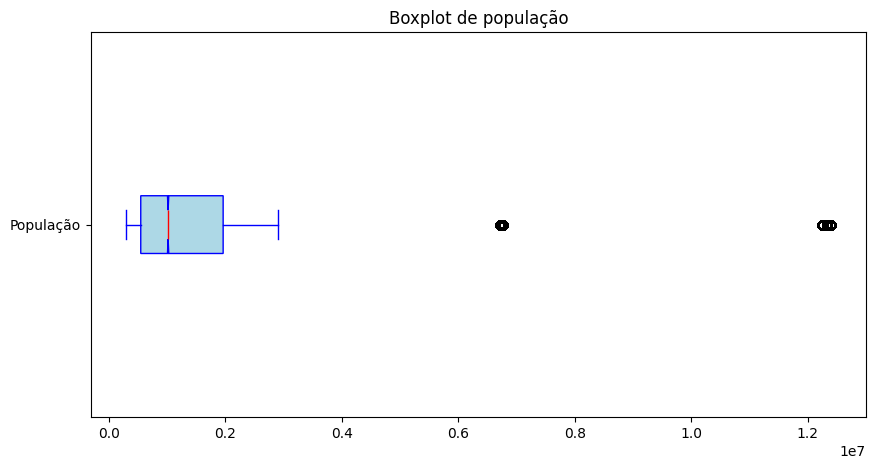

In [46]:
# Criando um boxplot para a coluna População 
plt.figure(figsize=(10, 5))
plt.boxplot(dataset_copia['População'], notch=True, vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            flierprops=dict(marker='o', color='blue', alpha=0.5))

plt.yticks([1], ['População'])
plt.title('Boxplot de população')
plt.show()

Outliers encontrados:
0        4.667901e+08
25       4.273419e+08
26       4.273419e+08
27       4.273419e+08
28       4.968546e+08
             ...     
40229    3.909048e+08
40235    7.719368e+08
40241    2.747358e+09
40242    2.747358e+09
40243    2.747358e+09
Name: Valor, Length: 5495, dtype: float64
Quantidade de outliers: 5495


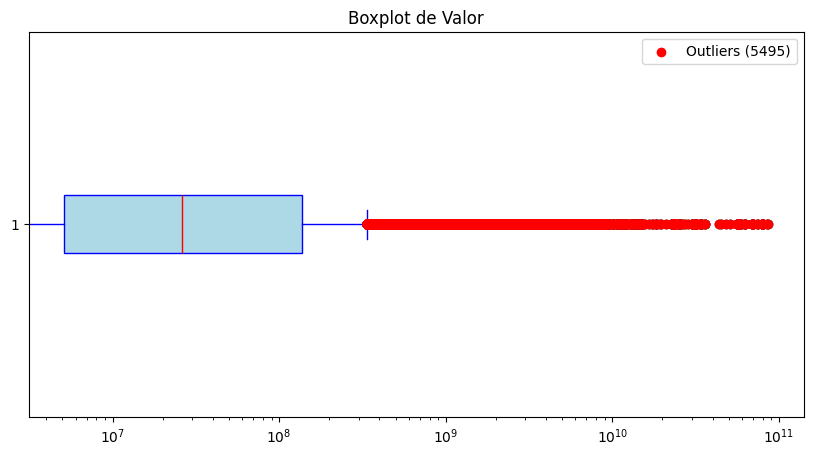

In [47]:

# Calculando Q1 (primeiro quartil) e Q3 (terceiro quartil)
Q1 = np.percentile(dataset_copia['Valor'], 25)
Q3 = np.percentile(dataset_copia['Valor'], 75)

# Calculando o IQR (intervalo interquartil)
IQR = Q3 - Q1

# Definindo os limites inferior e superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificando os outliers
outliers = dataset_copia['Valor'][(dataset_copia['Valor'] < limite_inferior) | 
                                  (dataset_copia['Valor'] > limite_superior)]

# Exibindo os outliers
print("Outliers encontrados:")
print(outliers)


# Quantidade de outliers
quantidade_outliers = len(outliers)
print(f"Quantidade de outliers: {quantidade_outliers}")

# Boxplot para a coluna 'Valor'
plt.figure(figsize=(10, 5))
plt.boxplot(dataset_copia['Valor'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            )

# Destacando os outliers com pontos vermelhos
plt.scatter(outliers, np.ones(len(outliers)), color='red', zorder=2, label=f'Outliers ({quantidade_outliers})')

plt.xscale('log')  # Colocando o eixo x em escala logarítmica, pois os valores variam muito
plt.title('Boxplot de Valor')
plt.legend()
plt.show()


Por ter uma quantidade considerável de outliers, resolvemos mostrar a quantidade de outliers (5495) no gráfico, já que a visualização por "bolinhas" não ficou tão boa.
A existência de tantos outliers pode ser explicada pela própria natureza dos dados da coluna, já que representa os valores pagos em diferentes contas e em diferentes realidades e contextos.

In [48]:
# Removendo outliers
dataset_copia = dataset_copia[(dataset_copia['População'] <dataset_copia['População'].quantile(0.95))]

A remoção de outliers talvez não seja ideal para a coluna valor, já que há tantos e a existência deles serve para entendermos mais o contexto do dado, não representando, portanto, algo negativo ou que poderá atrapalhar as demais fases da análise.

### Faremos o mesmo para para um dataset sem os valores negativos da coluna 'valor', para efeito de comparativo


In [49]:
df_exclui_negativos = dataset_copia[dataset_copia['Valor'] >= 0].copy() #retorna apenas as linhas que contem valores positivos na coluna 'valor'

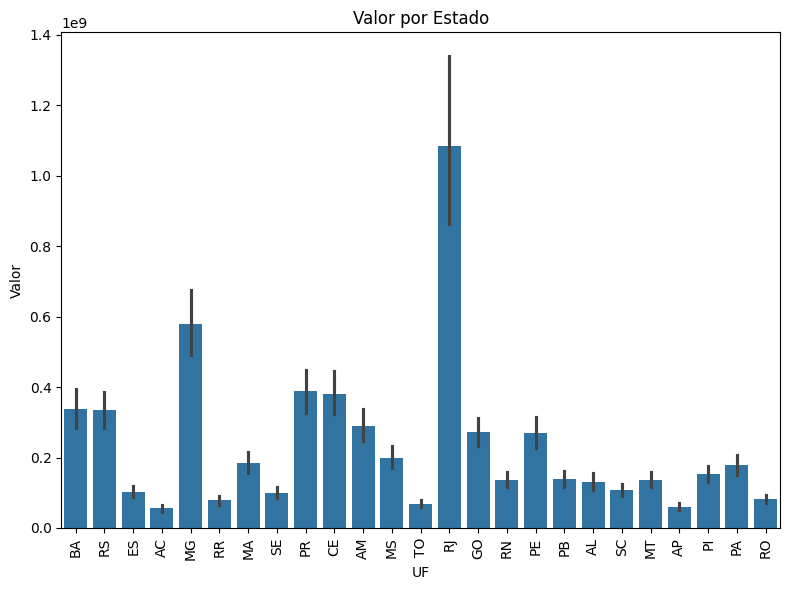

In [50]:
plt.figure(figsize=(8, 6)) 
sns.barplot(x='UF', y='Valor', data=df_exclui_negativos)

plt.title('Valor por Estado')
plt.xlabel('UF')
plt.ylabel('Valor')

plt.xticks(rotation=90)

plt.tight_layout()  
plt.show()

> Os gráficos de valor x UF são praticamente idênticos aos gráficos que levam os valores negativos em consideração. Por isso, acreditamos que a existência de valores negativos em 'valor' não afetará significamente nossa análise (nesse contexto)

## Perguntas

### Pergunta 1

Quais foram as principais fontes de receita das entidades nos anos escolhidos?

In [74]:
df_agroup = dataset_copia.groupby('Conta')['Valor'].sum().reset_index()
df_agroup.count()
# Logo verificamos que existem 38 tipos de contas

Conta    38
Valor    38
dtype: int64

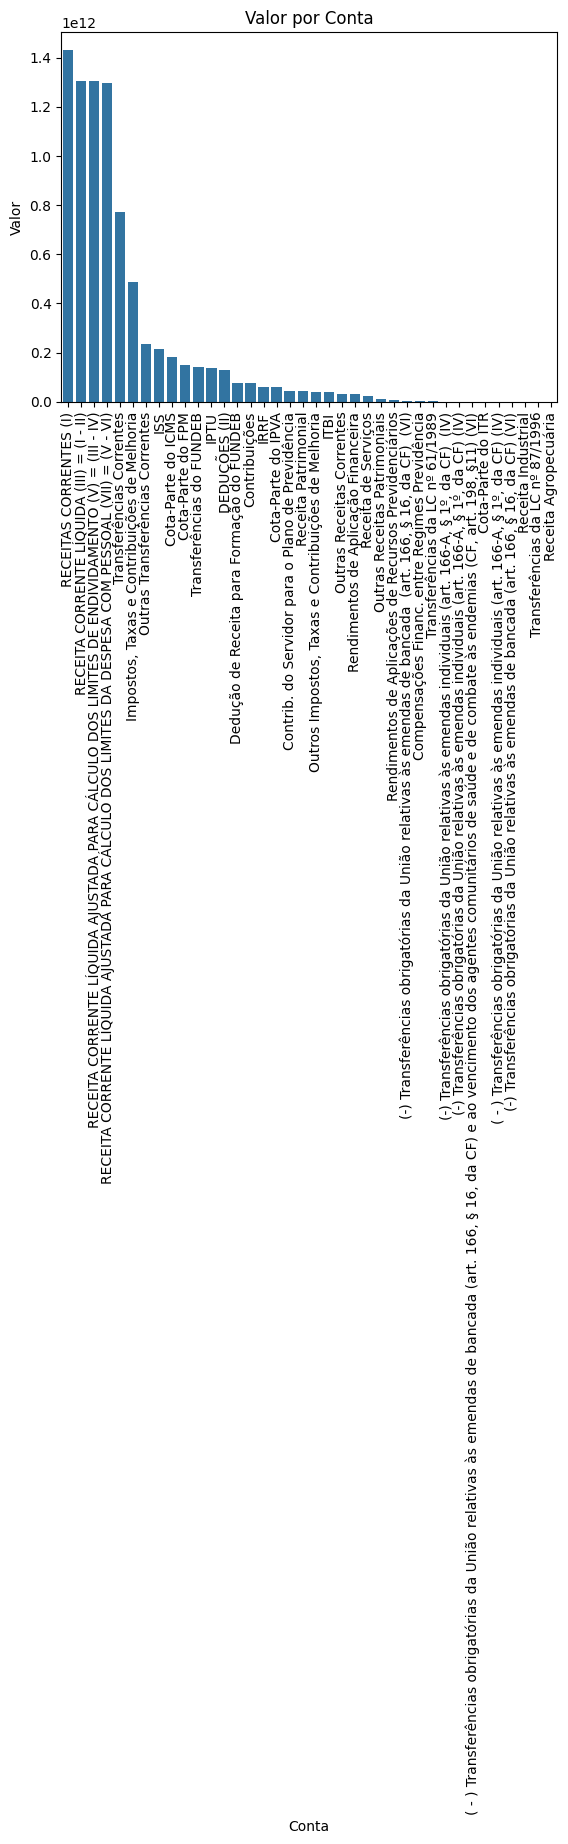

In [68]:
df_grouped_sorted = df_agroup.sort_values(by='Valor', ascending=False)

sns.barplot(x='Conta', y='Valor', data=df_grouped_sorted)
plt.title('Valor por Conta')
plt.xlabel('Conta')
plt.ylabel('Valor')
plt.xticks(rotation=90)  
plt.show()

C:\Users\gabri\AppData\Local\Temp\ipykernel_25868\3420454417.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Valor', y='Conta', data=df_top, palette='Blues_d')


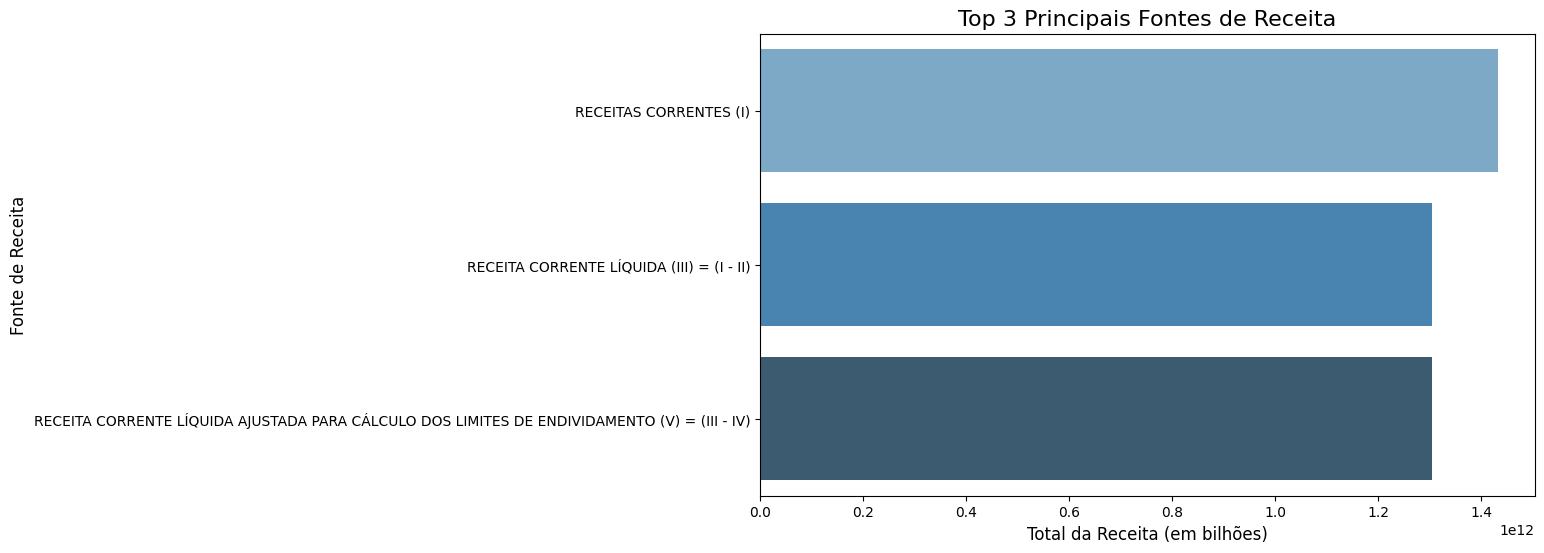

In [80]:
# Selecionando os principais valores, por exemplo, os 10 maiores
top_n = 3
df_top = df_grouped_sorted.head(top_n)

# Configurando o tamanho do gráfico
plt.figure(figsize=(10, 6))


# Criando o gráfico de barras com seaborn
sns.barplot(x='Valor', y='Conta', data=df_top, palette='Blues_d')

# Adicionando título e labels
plt.title(f'Top {top_n} Principais Fontes de Receita', fontsize=16)
plt.xlabel('Total da Receita (em bilhões)', fontsize=12)
plt.ylabel('Fonte de Receita', fontsize=12)

# Exibindo o gráfico
plt.show()

Analisando o gráfico Valor x Coluna, podemos perceber que as contas com maior valor é:
- Receitas correntes(I)
- Receitas correntes líquidas (III)
- Receita corrente líquida ajustada para cálculo dos limites de endividamente (V)

Porque essas contas se destacam mais? 

A receita corrente refere-se a todas as receitas que o governo arrecadou, incluindo tributos, taxas, contribuições, etc.
É com esse dinheiro que o governo financia despesas correntes, como salários, manutenção de serviços e pagamento de dividas. Então, de fato, espera-se que ela possua altos valores.

As receitas correntes líquidas são obtidas após a dedução de devoluções e restituições das receitas correntes totais. Ela é importante, pois representa a quantia efetivamente disponível para o governo financiar suas despesas e investimentos.

A receita corrente líquida ajustada para cálculo dos limites da despesa com pessoal: Essa receita ajustada é importante para garantir que as despesas com pessoal não excedam os limites estabelecidos pela Lei de Responsabilidade Fiscal (LRF). Por isso que ela está entre as com maiores valores.

A receita corrente líquida ajustada para cálculo dos limites de endividamento, semelhante à conta anterior, ajuda a monitorar e controlar o endividamento público. Manter a dívida dentro dos limites legais é essencial para a saúde financeira do governo e para evitar crises fiscais.

Impostos, taxas e contribuições de melhoria representam a principal fonte de arrecadação do governo. Impostos são a base da arrecadação, enquanto taxas e contribuições garantem que os serviços públicos sejam financiados de acordo com o uso e benefício proporcionado aos cidadãos. Dessa forma, essa conta está muito relacionada à receita corrente.

ISS (Imposto Sobre Serviços) e o IPTU: são importantes fontes de receita para os municípios, refletindo a atividade econômica local. Com a urbanização crescente, espera-se que esses impostos tenha altos valores, pois está diretamente ligado à prestação de serviços na área urbana.

As Transferências correntes garantem que estados e municípios possam financiar programas essenciais. Essas transferências são críticas para a manutenção de serviços públicos, o que explica sua presença no gŕafico.


### Pergunta 2

Qual foi a tendência dos valores (receitas ou despesas) ao longo dos anos para a Prefeitura de João Pessoa?

In [54]:
df_jp = dataset_copia[dataset_copia['UF'] == "PB"]

df_jp

,Ano,Instituição,UF,População,Conta,Identificador da Conta,Valor
7008,2020,Prefeitura Municipal de João Pessoa - PB,PB,809015,RECEITAS CORRENTES (I),siconfi-cor_ReceitasCorrentesLiquidasExcetoTra...,2.246429e+08
7009,2020,Prefeitura Municipal de João Pessoa - PB,PB,809015,"Impostos, Taxas e Contribuições de Melhoria",siconfi-cor_ReceitaTributariaLiquidaExcetoTran...,9.306658e+07
7010,2020,Prefeitura Municipal de João Pessoa - PB,PB,809015,IPTU,siconfi-cor_IPTULiquidoExcetoTransferenciasEFU...,4.432946e+07
7011,2020,Prefeitura Municipal de João Pessoa - PB,PB,809015,ISS,siconfi-cor_ISSLiquidoExcetoTransferenciasEFUNDEB,1.964415e+07
7012,2020,Prefeitura Municipal de João Pessoa - PB,PB,809015,ITBI,siconfi-cor_ITBILiquidoExcetoTransferenciasEFU...,9.008098e+06
...,...,...,...,...,...,...,...
37886,2023,Prefeitura Municipal de João Pessoa - PB,PB,817511,Compensações Financ. entre Regimes Previdência,siconfi-cor_CompensacaoFinanceiraEntreRegimesP...,1.200000e+07
37887,2023,Prefeitura Municipal de João Pessoa - PB,PB,817511,Dedução de Receita para Formação do FUNDEB,siconfi-cor_DeducaoDeReceitaParaFormacaoDoFUNDEB,1.700660e+08
37888,2023,Prefeitura Municipal de João Pessoa - PB,PB,817511,RECEITA CORRENTE LÍQUIDA (III) = (I - II),siconfi-cor_RREO3ReceitaCorrenteLiquida,2.866818e+09
37889,2023,Prefeitura Municipal de João Pessoa - PB,PB,817511,RECEITA CORRENTE LÍQUIDA AJUSTADA PARA CÁLCULO...,siconfi-cor_RREO3ReceitaCorrenteLiquidaAjustad...,2.866818e+09


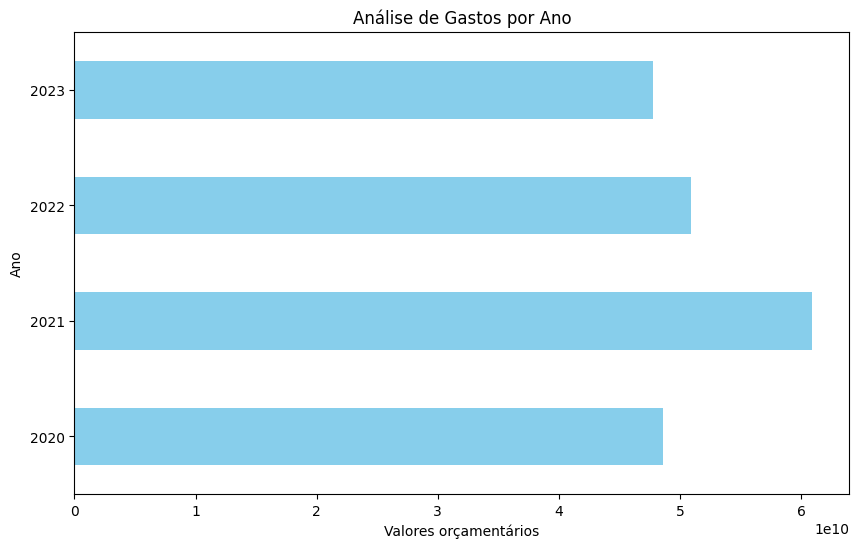

In [81]:
# Vamos agrupar os valores por "Ano" e somar os valores correspondentes
gastos_por_ano = df_jp.groupby('Ano')['Valor'].sum()


plt.figure(figsize=(10, 6))
gastos_por_ano.plot(kind='barh', color='skyblue')


plt.title('Análise de Gastos por Ano')
plt.xlabel('Valores orçamentários')
plt.ylabel('Ano')


plt.show()

>Analisando o gráfico, observamos que 2021 foi o ano com o maior valor orçamentário registrado, refletindo a recuperação econômica após os desafios impostos pela pandemia de 2020. Esse crescimento significativo pode ser atribuído a transferências governamentais, investimentos em infraestrutura e uma gestão fiscal mais eficiente. Em 2022 e 2023, apesar de uma ligeira redução nos valores, os níveis orçamentários se mantiveram elevados, consolidando o processo de recuperação econômica. O ano de 2020, marcado pelos impactos diretos da pandemia, apresentou o menor valor orçamentário no período analisado.

### Pergunta 3

 Há relação entre o tamanho da população e o valor das receitas obtidas em cada ano?

In [147]:
# Calcular a inercia (soma das distâncias) para os valores de K
X = dataset_copia[['População','Valor']].values
inercia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inercia.append(kmeans.inertia_)

> Uma coisa interessante que aprendemos pesquisando mais sobre inércia é que quanto menor ela for (ponta do cotovelo), mais organizados e coerentes os dados são.

Aqui está o artigo no Medium, muito bom por sinal ([Inertia For ML Applications](https://medium.com/@matthew.dicicco38/inertia-for-ml-applications-8c38de2d10d7)). Foi este artigo que utilizamos para relembrar o que é inercia e o gráfico do cotovelo.

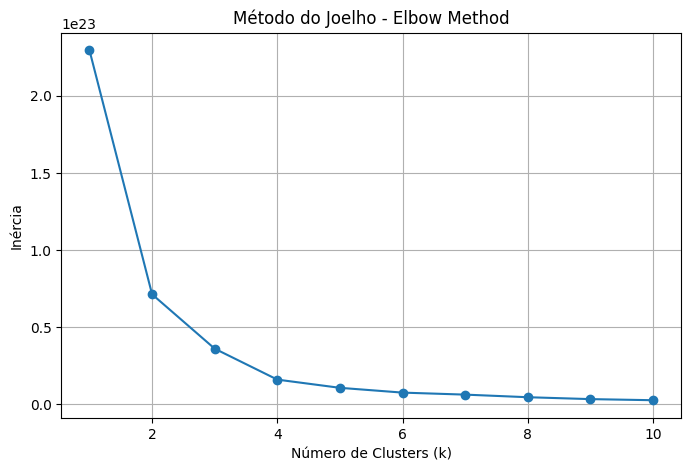

In [148]:
# Plotando o gráfico do joelho (para saber o valor ideal para K)
plt.figure(figsize=(8, 5))
plt.plot(k_values, inercia, marker='o')
plt.title('Método do Joelho - Elbow Method')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.grid(True)
plt.show()

> Apesar do gráfico do joelho nos mostrar que a melhor escolha é k=3, optamos por usar k=4 pois a clusterização aconteceu de maneira mais segmentada, conforme mostramos na fase 4 do projeto quando plotamos o mesmo gŕafico com diferentes valores para k.


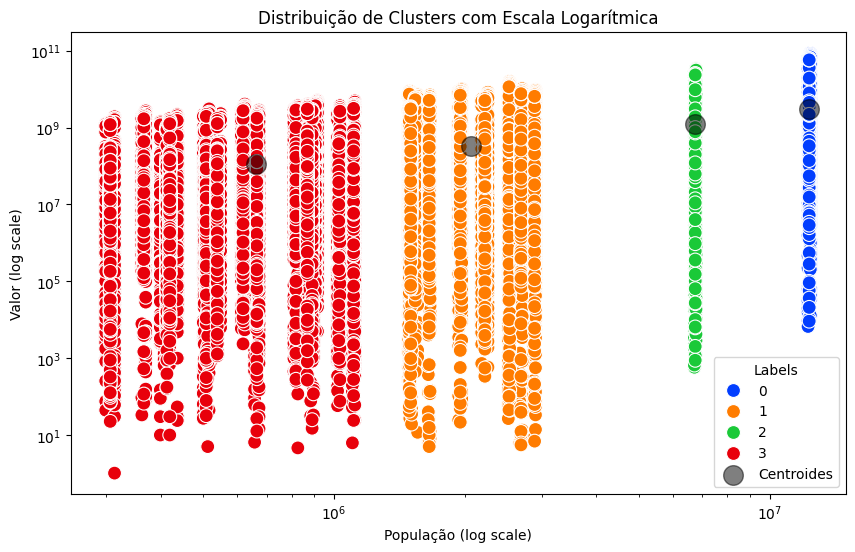

In [150]:
scaler = MinMaxScaler()
dataset_scaled = scaler.fit_transform(dataset_copia[['População', 'Valor']])

kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans.fit(dataset_scaled)
dataset_copia['labels'] = kmeans.labels_

centroides = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset_copia, x='População', y='Valor', hue='labels', palette='bright', s=100)
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', s=200, alpha=0.5, label='Centroides') #definimos visualmente os centróides para podermos ver onde eles realmente estão

plt.xscale('log')
plt.yscale('log')

plt.xlabel('População (log scale)')
plt.ylabel('Valor (log scale)')
plt.legend(title='Labels')
plt.title('Distribuição de Clusters com Escala Logarítmica')
plt.show()



Observando o gráfico, temos que

- Os Clusters 1 (laranja) e 3 (verde) têm populações maiores e também apresentam receitas mais elevadas e concentradas, o que sugere que há uma tendência de que cidades ou regiões com populações maiores também tenham receitas maiores.
- Os clusters 0 (azul) e 2 (vermelho) abrangem cidades ou regiões com populações menores e maior variação no valor das receitas. Isso pode sugerir que, em populações menores, há mais variabilidade na receita, podendo ser influenciada por outros fatores.

Analisando o gráfico surge a seguinte pergunta: Há relação entre o tamanho da população e o valor das receitas obtidas em cada ano? Por que algumas regiões com pequenas populações apresentam valores elevados de execução orçamentária? Há realmente coerência entre o tamanho populacional e a execução orçamentária?(é contra-intuitivo, devemos analisar melhor!)

 Pensamos na ação de políticas públicas. Regiões podem ter recebido orçamento para a melhoria, por exemplo, da infraestrutura, para a construção de prédios públicos ou até mesmo para auxílios em desastres naturais; E esses fatores podem não estar diretamente ligados ao tamanho da população, mas sim às necessidades dela.

 Por isso, para além de uma análise de dados, para responder essas perguntas, precisamos compreender o contexto socioeconômico e das necessidades da população. Por isso, nem sempre a coluna 'Valor' está associada à coluna 'População'!

## Conclusão

Portanto, nosso grupo analisou as receitas financeiras e populacionais de municípios brasileiros entre 2020 e 2023, utilizando técnicas de análise descritiva e clusterização. Os resultados revelaram uma significativa variabilidade na execução orçamentária e na população dos municípios, evidenciando que não existe uma relação linear clara entre o tamanho populacional e os valores orçamentários. A mudança de k = 3 para k = 4 clusters proporcionou uma segmentação mais refinada, permitindo identificar discrepâncias regionais que podem refletir a implementação de políticas públicas específicas ou projetos de infraestrutura. Com isso, a análise possibilitou a resposta das nossas perguntas tendo insights sobre o financeiro do estado não só da Paraíba como de todo o Brasil.

Essas descobertas são cruciais para a compreensão da gestão financeira municipal, pois ajudam a identificar perfis distintos e áreas que requerem atenção especial nas políticas públicas. No entanto, o estudo apresenta limitações, como a falta de dados mais detalhados sobre despesas específicas e variáveis socioeconômicas, que poderiam enriquecer a análise e proporcionar uma visão mais aprofundada dos padrões orçamentários.

Para trabalhos futuros, pensamos na inclusão de dados adicionais, como PIB local e indicadores de desenvolvimento humano, para compreendermos melhor as causas das discrepâncias observadas entre população e execução orçamentária. Melhorias na análise de valores negativos e a consideração de fatores contextuais que impactam a execução orçamentária também são áreas promissoras para investigações futuras.